In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
aa = np.array([1,2,3,4,5])

In [13]:
filt = aa>2
aa[filt] = 0

In [14]:
aa

array([1, 2, 0, 0, 0])

## Accretion fraction onto BH from kernel

In [9]:
def f_acc_func(v_kick, BH_BAL_KICK_MOMENTUM_FLUX=20.0, eta=0.1, BAL_f_accretion=0.1):
    result = np.zeros(len(v_kick))
    positive_v_kick_filter = v_kick > 0
    non_pos_v_kick_filter = v_kick <= 0
    result[positive_v_kick_filter] = 1./(1. + BH_BAL_KICK_MOMENTUM_FLUX*eta*3e5/v_kick[positive_v_kick_filter])
    result[non_pos_v_kick_filter] = BAL_f_accretion
    return result

In [30]:
v_kick_arr = np.append([0], np.logspace(-2, 8, 10000))
v_kick_arr

array([0.00000000e+00, 1.00000000e-02, 1.00230547e-02, ...,
       9.95404959e+07, 9.97699834e+07, 1.00000000e+08], shape=(10001,))

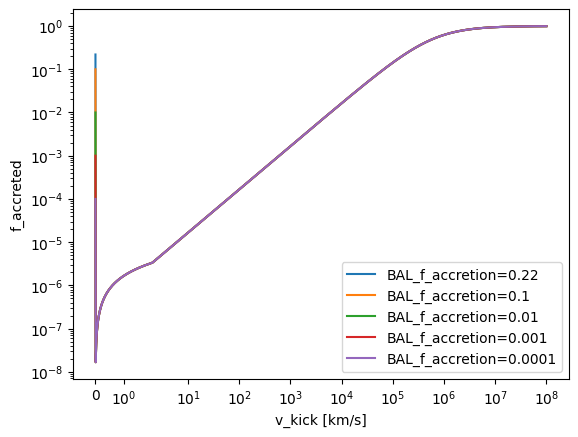

In [38]:
for BAL_f_accretion_val, lw in zip([0.22, 1e-1, 1e-2, 1e-3, 1e-4], [1.5]*5):
    f_acc_arr = f_acc_func(v_kick_arr, BAL_f_accretion=BAL_f_accretion_val)
    plt.plot(v_kick_arr, f_acc_arr, lw=lw, label=f'BAL_f_accretion={BAL_f_accretion_val}')

plt.xlabel('v_kick [km/s]')
plt.ylabel('f_accreted')
plt.xscale('symlog')
plt.yscale('log')
plt.legend()

## Scaling of BH radiative wind + jet velocity

In [62]:
np.fmin(np.array([1,2,3,4,5,6]), 0)

array([0, 0, 0, 0, 0, 0])

In [63]:
np.fmin(1, 0)

np.int64(0)

In [94]:
def v_bh_func(Mbh, fedd=1, Mbh_min=7e7, Mbh_max=1e8, fedd_for_jet=0.2, jet_scale=10000,
              scale_with_activation=False, scale_with_fedd=False, 
              scale_with_Mbh=False, scale_with_Mbh_factor=1e8):
    ## No scale factor (a) dependence here
    
    v_wind = 500 + 500*(np.log10(Mbh) - 6.)/3.

    
    v_jet = np.zeros(len(Mbh))
    if fedd < fedd_for_jet:
        jet_filt = Mbh>=Mbh_min
    
        jet_activation_factor = 1
        if scale_with_activation:
            jet_activation_factor = np.fmin((Mbh - Mbh_min)/(Mbh_max - Mbh_min), 1.)[jet_filt]
        # print(jet_activation_factor)
    
        if scale_with_fedd:
            jet_fedd_factor = np.log10(fedd_for_jet/fedd)
        else:
            jet_fedd_factor = np.fmin(np.log10(fedd_for_jet/fedd), 1.)
        
        v_jet[jet_filt] = jet_scale * jet_activation_factor * jet_fedd_factor

    
    v_bh = v_wind + v_jet

    if scale_with_Mbh:
        jet_vmax_factor = np.fmax((Mbh/scale_with_Mbh_factor)**(1./3.), 1.)
        jet_vmax_factor_high = jet_vmax_factor>5
        jet_vmax_factor[jet_vmax_factor_high] = 5
        jet_vmax_factor_low = jet_vmax_factor<1
        jet_vmax_factor[jet_vmax_factor_low] = 1
        # print(jet_vmax_factor)

        jet_vmax = jet_vmax_factor * jet_scale
        # print(len(jet_vmax))
        # print(jet_vmax)
        jet_vmax_filter = v_bh > jet_vmax
        v_bh[jet_vmax_filter] = jet_vmax[jet_vmax_filter]

    return v_bh

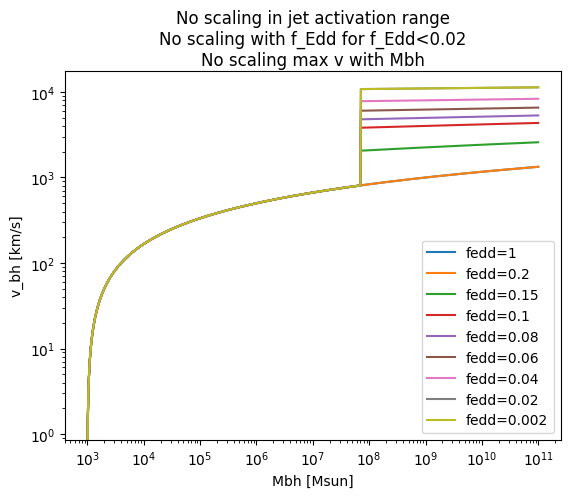

In [98]:
Mbh_arr = np.logspace(3, 11, 1000)

for fedd in [1, 2e-1, 1.5e-1, 1e-1, 8e-2, 6e-2, 4e-2, 2e-2, 2e-3]:#, 2e-4, 2e-5, 2e-6, 2e-7]:
    v_bh_arr = v_bh_func(Mbh_arr, fedd=fedd, 
                         scale_with_activation=False, scale_with_fedd=False, scale_with_Mbh=False)

    plt.plot(Mbh_arr, v_bh_arr, label=f'fedd={fedd}')

plt.title('No scaling in jet activation range\nNo scaling with f_Edd for f_Edd<0.02\nNo scaling max v with Mbh', wrap=True)
plt.xlabel('Mbh [Msun]')
plt.ylabel('v_bh [km/s]')
plt.xscale('log')
plt.yscale('log')
plt.legend()

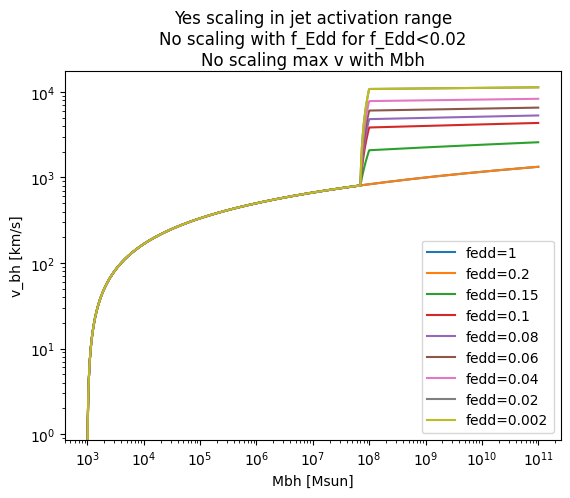

In [99]:
Mbh_arr = np.logspace(3, 11, 1000)

for fedd in [1, 2e-1, 1.5e-1, 1e-1, 8e-2, 6e-2, 4e-2, 2e-2, 2e-3]:#, 2e-4, 2e-5, 2e-6, 2e-7]:
    v_bh_arr = v_bh_func(Mbh_arr, fedd=fedd, 
                         scale_with_activation=True, scale_with_fedd=False, scale_with_Mbh=False)

    plt.plot(Mbh_arr, v_bh_arr, label=f'fedd={fedd}')

plt.title('Yes scaling in jet activation range\nNo scaling with f_Edd for f_Edd<0.02\nNo scaling max v with Mbh', wrap=True)
plt.xlabel('Mbh [Msun]')
plt.ylabel('v_bh [km/s]')
plt.xscale('log')
plt.yscale('log')
plt.legend()

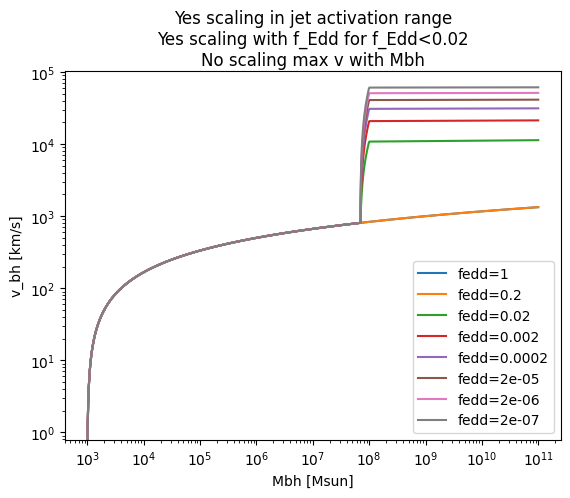

In [100]:
Mbh_arr = np.logspace(3, 11, 1000)

for fedd in [1, 2e-1, 2e-2, 2e-3, 2e-4, 2e-5, 2e-6, 2e-7]:
    v_bh_arr = v_bh_func(Mbh_arr, fedd=fedd, 
                         scale_with_activation=True, scale_with_fedd=True, scale_with_Mbh=False)

    plt.plot(Mbh_arr, v_bh_arr, label=f'fedd={fedd}')

plt.title('Yes scaling in jet activation range\nYes scaling with f_Edd for f_Edd<0.02\nNo scaling max v with Mbh', wrap=True)
plt.xlabel('Mbh [Msun]')
plt.ylabel('v_bh [km/s]')
plt.xscale('log')
plt.yscale('log')
plt.legend()

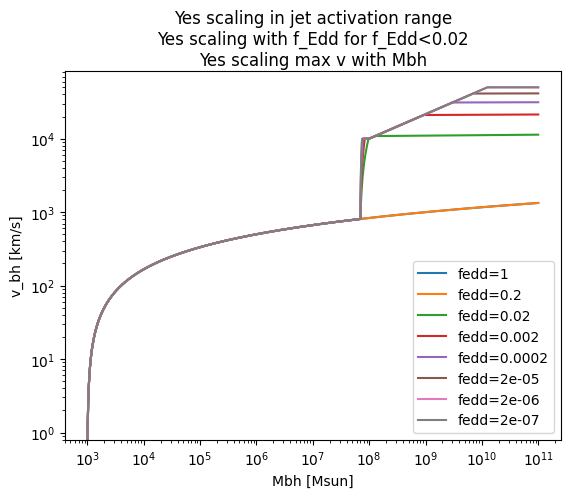

In [101]:
Mbh_arr = np.logspace(3, 11, 1000)

for fedd in [1, 2e-1, 2e-2, 2e-3, 2e-4, 2e-5, 2e-6, 2e-7]:
    v_bh_arr = v_bh_func(Mbh_arr, fedd=fedd, 
                         scale_with_activation=True, scale_with_fedd=True, scale_with_Mbh=True)

    plt.plot(Mbh_arr, v_bh_arr, label=f'fedd={fedd}')

plt.title('Yes scaling in jet activation range\nYes scaling with f_Edd for f_Edd<0.02\nYes scaling max v with Mbh', wrap=True)
plt.xlabel('Mbh [Msun]')
plt.ylabel('v_bh [km/s]')
plt.xscale('log')
plt.yscale('log')
plt.legend()

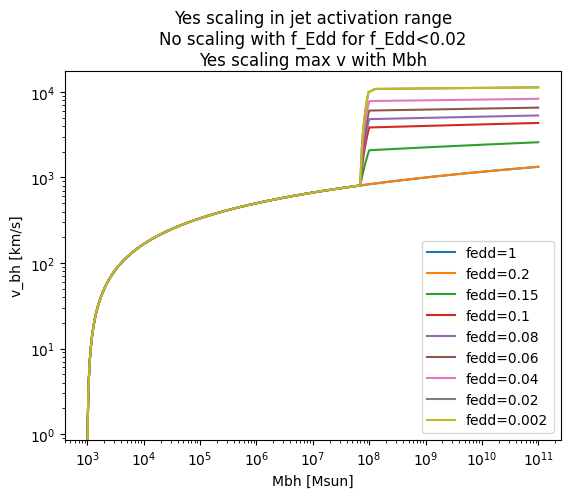

In [103]:
Mbh_arr = np.logspace(3, 11, 1000)

for fedd in [1, 2e-1, 1.5e-1, 1e-1, 8e-2, 6e-2, 4e-2, 2e-2, 2e-3]:
    v_bh_arr = v_bh_func(Mbh_arr, fedd=fedd, 
                         scale_with_activation=True, scale_with_fedd=False, scale_with_Mbh=True)

    plt.plot(Mbh_arr, v_bh_arr, label=f'fedd={fedd}')

plt.title('Yes scaling in jet activation range\nNo scaling with f_Edd for f_Edd<0.02\nYes scaling max v with Mbh', wrap=True)
plt.xlabel('Mbh [Msun]')
plt.ylabel('v_bh [km/s]')
plt.xscale('log')
plt.yscale('log')
plt.legend()

## Scaling of BH accretion rate

In [54]:
def bh_acc_func(Mbh, suppress=False, Mbh_suppress=3e6, eta=0.1, torque_scale=1, bondi_scale=1):
    Mdot_torque = torque_scale * Mbh**(1./6.)
    Mdot_bondi = bondi_scale * Mbh**2
    Mdot_tot = (1-eta)*(Mdot_torque + Mdot_bondi)
    if suppress:
        # suppress_filt = Mbh<3e6
        suppress_factor = 1 - np.exp(-Mbh/Mbh_suppress)
        Mdot_tot *= suppress_factor
    return Mdot_tot

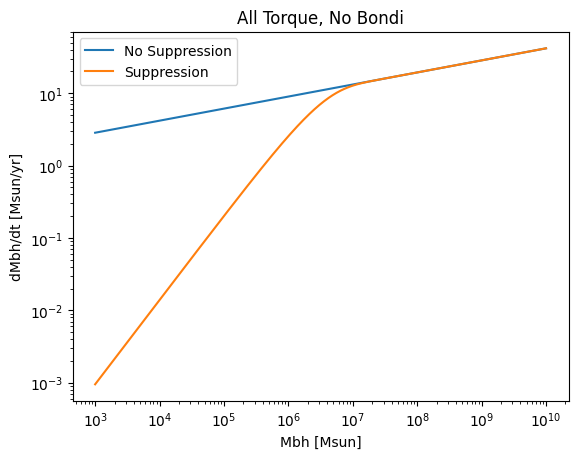

In [57]:
Mbh_arr = np.logspace(3, 10, 1000)

torque = 1
bondi = 0
bh_acc_arr = bh_acc_func(Mbh_arr, torque_scale=torque, bondi_scale=bondi)
bh_acc_suppress_arr = bh_acc_func(Mbh_arr, suppress=True, torque_scale=torque, bondi_scale=bondi)

plt.plot(Mbh_arr, bh_acc_arr, label='No Suppression')
plt.plot(Mbh_arr, bh_acc_suppress_arr, label='Suppression')

plt.title('All Torque, No Bondi')
plt.xlabel('Mbh [Msun]')
plt.ylabel('dMbh/dt [Msun/yr]')
plt.xscale('log')
plt.yscale('log')
plt.legend()

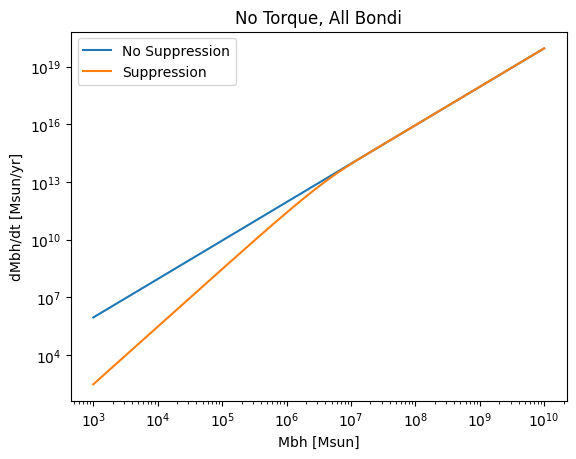

In [58]:
Mbh_arr = np.logspace(3, 10, 1000)

torque = 0
bondi = 1
bh_acc_arr = bh_acc_func(Mbh_arr, torque_scale=torque, bondi_scale=bondi)
bh_acc_suppress_arr = bh_acc_func(Mbh_arr, suppress=True, torque_scale=torque, bondi_scale=bondi)

plt.plot(Mbh_arr, bh_acc_arr, label='No Suppression')
plt.plot(Mbh_arr, bh_acc_suppress_arr, label='Suppression')

plt.title('No Torque, All Bondi')
plt.xlabel('Mbh [Msun]')
plt.ylabel('dMbh/dt [Msun/yr]')
plt.xscale('log')
plt.yscale('log')
plt.legend()

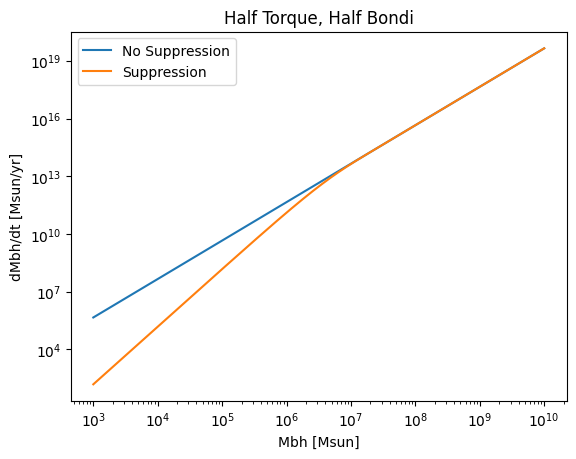

In [59]:
Mbh_arr = np.logspace(3, 10, 1000)

torque = 0.5
bondi = 0.5
bh_acc_arr = bh_acc_func(Mbh_arr, torque_scale=torque, bondi_scale=bondi)
bh_acc_suppress_arr = bh_acc_func(Mbh_arr, suppress=True, torque_scale=torque, bondi_scale=bondi)

plt.plot(Mbh_arr, bh_acc_arr, label='No Suppression')
plt.plot(Mbh_arr, bh_acc_suppress_arr, label='Suppression')

plt.title('Half Torque, Half Bondi')
plt.xlabel('Mbh [Msun]')
plt.ylabel('dMbh/dt [Msun/yr]')
plt.xscale('log')
plt.yscale('log')
plt.legend()